# **Coursera Course Dataset EDA**

## **Position statement for this sprint project:**

In this sprint project, I assume the role of a Data Scientist for an innovative organization dedicated to shaping the future of education. Our mission is to empower universities, colleges, and bootcamps by helping them design impactful courses that resonate with learners worldwide. Leveraging insights from the Coursera course dataset, I provide strategic, data-driven recommendations to craft courses that not only achieve high enrollment but also transform lives through education—while ensuring tangible business success for our partners.

## **EDA Objectives**

- Observe the data provided by Coursera:
Examine and understand the structure, completeness, and overall trends in the dataset.

- Understand student enrollment based on course difficulty:
Analyze how course difficulty levels affect student enrollment and identify which difficulty levels attract more learners.

- Gain insights into the course types that are most likely to have higher enrollment:
Evaluate which course types (e.g., Course, Specialization, Professional Certificate) show a correlation with higher enrollment rates.

- Identify potential ways to achieve good enrollment levels and reach top courses by enrollment:
Investigate strategies or course characteristics that contribute to higher enrollment and appearing in the top courses.

- Identify the top topics that courses with the highest enrollment focus on:
Analyze the most popular course topics and identify key subject areas for high-enrollment courses.

- Provide a suggestion for an ideal number of courses to start with:
Based on the data, recommend an optimal number of courses to launch to achieve successful enrollment rates.

- Provide further suggestions for making more relevant decisions:
Offer additional recommendations that can enhance decision-making, such as considering regional trends, course duration, or industry relevance.

### **IMPORTING LIBRARIES AND DATASET**

**1. Importing necessary libraries and the CSV file, and checking its shape.**


In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [82]:
df = pd.read_csv("../DATA/coursea_data.csv")
df.shape

(891, 7)

**2. Cheking the dataset by printing out head of it to understand data set**

In [83]:
df.head(10)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.70,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.70,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.50,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.70,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.80,Mixed,320k
5,661,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.70,Beginner,39k
6,54,AI For Everyone,deeplearning.ai,COURSE,4.80,Beginner,350k
7,488,AI For Medical Treatment,deeplearning.ai,COURSE,4.80,Intermediate,2.4k
8,58,AI Foundations for Everyone,IBM,SPECIALIZATION,4.70,Beginner,61k
9,129,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.70,Intermediate,12k


Conclusion:
At first glance, there are 891 data entries with 7 different features (data points). Some data requires scaling. The purpose of the "Unnamed: 0" column is unclear.

###  **DATA CLEANING**

**3.** 

- Checking for dublicates, nulls and NA values to ensure that data is relevant. 
- Observing data types and main information.
- Checking for any inconsistent data entries.
- Dropping unnesesary column.
-  Setting numeric data to display with two decimal places for better readability.

In [84]:
int(df.duplicated().sum())


0

In [85]:
df.isnull().sum()

Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [86]:
df.isna().sum()

Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [87]:
pd.set_option("display.float_format", "{:.2f}".format)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                891 non-null    int64  
 1   course_title              891 non-null    object 
 2   course_organization       891 non-null    object 
 3   course_Certificate_type   891 non-null    object 
 4   course_rating             891 non-null    float64
 5   course_difficulty         891 non-null    object 
 6   course_students_enrolled  891 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 48.9+ KB


,Unnamed: 0,course_rating
count,891.00,891.00
mean,445.00,4.68
std,257.35,0.16
min,0.00,3.30
25%,222.50,4.60
50%,445.00,4.70
75%,667.50,4.80
max,890.00,5.00


In [88]:
cert = df["course_Certificate_type"].unique()
cert.sort()
cert


array(['COURSE', 'PROFESSIONAL CERTIFICATE', 'SPECIALIZATION'],
      dtype=object)

In [89]:

diff = df["course_difficulty"].unique()
diff.sort()
diff

array(['Advanced', 'Beginner', 'Intermediate', 'Mixed'], dtype=object)

**4. Dropping the 'Unnamed' column as it doesn't contain usable (reliable) information. It could be the list number based on rating**

In [90]:
cd_df=df.drop(['Unnamed: 0'],axis='columns')
cd_df.head()

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.70,Beginner,5.3k
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.70,Intermediate,17k
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.50,Mixed,130k
3,A Law Student's Toolkit,Yale University,COURSE,4.70,Mixed,91k
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.80,Mixed,320k


**5.Converting student enrollment from 'K' to a full numeric value. (object -> int64) Observing data types and main information after changes.**

In [91]:
cd_df['course_students_enrolled']=cd_df['course_students_enrolled'].replace({'k': '*1e3', 'm': '*1e6'}, regex=True).map(pd.eval).astype(int)
cd_df.head(10)   

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.70,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.70,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.50,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.70,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.80,Mixed,320000
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.70,Beginner,39000
6,AI For Everyone,deeplearning.ai,COURSE,4.80,Beginner,350000
7,AI For Medical Treatment,deeplearning.ai,COURSE,4.80,Intermediate,2400
8,AI Foundations for Everyone,IBM,SPECIALIZATION,4.70,Beginner,61000
9,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.70,Intermediate,12000


In [92]:
cd_df.info()
cd_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 41.9+ KB


,course_rating,course_students_enrolled
count,891.00,891.00
mean,4.68,90552.08
std,0.16,181936.45
min,3.30,1500.00
25%,4.60,17500.00
50%,4.70,42000.00
75%,4.80,99500.00
max,5.00,3200000.00


### **Conclusion:**

The data had no missing values or nulls. 
One column contained values that had no understandable meaning for exploratory data analysis, so its removed. 
There are 3 different course certificate types and 4 difficulties.  
For the column consisting of student enrollments, scaling from 'K' to full numbers was necessary for better EDA.


### **Outliers:**

In [93]:
numerical_cols = cd_df.select_dtypes(include=['int64', 'float64']).columns

outlier_indices = set()

for col in numerical_cols:
    Q1 = cd_df[col].quantile(0.25)
    Q3 = cd_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = cd_df[(cd_df[col] < lower) | (cd_df[col] > upper)].index
    outlier_indices.update(outliers)

all_outliers_df = cd_df.loc[list(outlier_indices)]

print("Number of outliers per column:")
for col in numerical_cols:
    Q1 = cd_df[col].quantile(0.25)
    Q3 = cd_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    count = cd_df[(cd_df[col] < lower) | (cd_df[col] > upper)].shape[0]
    print(f"{col}: {count}")

all_outliers_df



Number of outliers per column:
course_rating: 17
course_students_enrolled: 78


,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
512,Introduction to Psychology,Yale University,COURSE,4.90,Beginner,270000
515,Introduction to Spreadsheets and Models,University of Pennsylvania,COURSE,4.20,Mixed,76000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.80,Mixed,320000
6,AI For Everyone,deeplearning.ai,COURSE,4.80,Beginner,350000
522,"Introduction to Trading, Machine Learning & GCP",New York Institute of Finance,COURSE,4.00,Intermediate,13000
...,...,...,...,...,...,...
486,Introduction to Data Science,IBM,SPECIALIZATION,4.60,Beginner,310000
487,Introduction to Data Science in Python,University of Michigan,COURSE,4.50,Intermediate,390000
504,Introduction to Mathematical Thinking,Stanford University,COURSE,4.80,Intermediate,270000
507,Introduction to Philosophy,The University of Edinburgh,COURSE,4.60,Mixed,370000


### **Conclusion:**
There are a few outliers in the data, and I will keep them in mind when interpreting the results. Since the dataset is not large and the goal is to understand both what works and what doesn’t, I will leave these outliers in the analysis. (It would be important if our goal would be building ML model)

### **EDA**

**6. Checking courses ratings.**

In [94]:
cd_df.sort_values(by='course_rating',inplace=False,ascending=False)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
251,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,COURSE,5.00,Beginner,1500
432,Infectious Disease Modelling,Imperial College London,SPECIALIZATION,5.00,Intermediate,1600
754,Stories of Infection,Stanford University,COURSE,4.90,Intermediate,28000
290,Everyday Parenting: The ABCs of Child Rearing,Yale University,COURSE,4.90,Beginner,86000
98,Boosting Creativity for Innovation,HEC Paris,COURSE,4.90,Beginner,9500
...,...,...,...,...,...,...
598,Mathematics for Machine Learning: PCA,Imperial College London,COURSE,4.00,Intermediate,33000
873,iOS App Development with Swift,University of Toronto,SPECIALIZATION,3.90,Intermediate,76000
569,Machine Learning for Trading,Google Cloud,SPECIALIZATION,3.90,Intermediate,15000
566,Machine Learning and Reinforcement Learning in...,New York University,SPECIALIZATION,3.70,Intermediate,29000


### **Conclusion:**

From first glimps, I can tell that the two courses with the highest, and also maximum, ratings are "Infectious Disease Modelling" and "El Abogado del Futuro...". It is important to point out that both courses have low student enrollment. The lowest rating is 3.30 for the course "How To Create a Website in a Weekend...". While enrollment is relatively high, it could be an outlier. To fully understand whether the high and low ratings are objective, I need to examine the correlation between enrollment and rating, as well as conduct a deeper exploratory data analysis (EDA).



**7. Checking ratings for courses.**

In [95]:
rating_counts = cd_df['course_rating'].value_counts().sort_index()

for rating, count in rating_counts.items():
    print(f"There are {count} courses that have a rating of {rating}.")



There are 1 courses that have a rating of 3.3.
There are 1 courses that have a rating of 3.7.
There are 2 courses that have a rating of 3.9.
There are 2 courses that have a rating of 4.0.
There are 1 courses that have a rating of 4.1.
There are 10 courses that have a rating of 4.2.
There are 15 courses that have a rating of 4.3.
There are 34 courses that have a rating of 4.4.
There are 80 courses that have a rating of 4.5.
There are 168 courses that have a rating of 4.6.
There are 251 courses that have a rating of 4.7.
There are 256 courses that have a rating of 4.8.
There are 68 courses that have a rating of 4.9.
There are 2 courses that have a rating of 5.0.


In [96]:
cd_df.groupby(["course_difficulty"])["course_rating"].mean()

course_difficulty
Advanced       4.60
Beginner       4.68
Intermediate   4.65
Mixed          4.71
Name: course_rating, dtype: float64

In [97]:
cd_df.groupby(["course_Certificate_type"])["course_rating"].mean()

course_Certificate_type
COURSE                     4.71
PROFESSIONAL CERTIFICATE   4.70
SPECIALIZATION             4.62
Name: course_rating, dtype: float64

### **Conclusion:**

Most of the courses are rated between 4.6 and 4.8. As mentioned earlier, only 2 courses have the maximum rating, and very few are below 4.5.
It seems that all difficulty levels have similar mean ratings, which suggests that difficulty does not affect the rating of the course.
The same applies to certification type; since the ratings are very close, it appears that the course type does not affect the rating of the course.

**8. Visualizing ratings and certification types, and examining how they correlate with the rating of the course.**

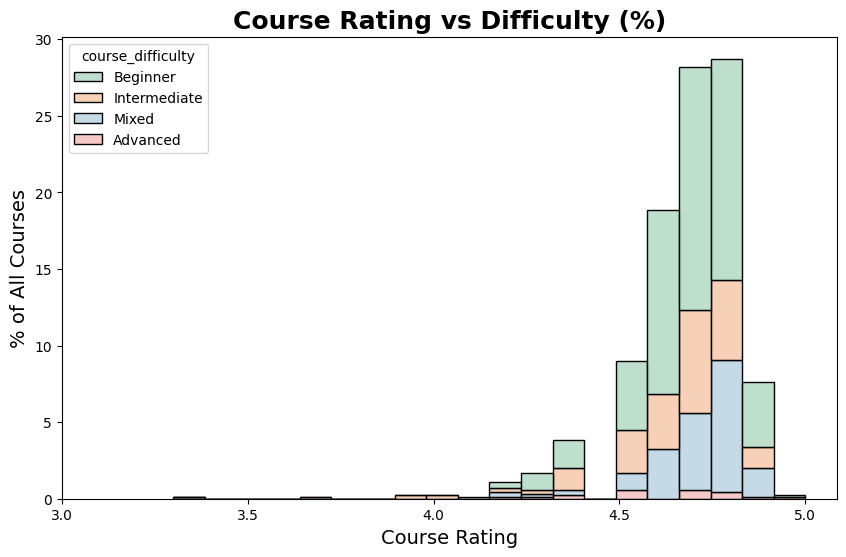

/var/folders/8t/6w6q98yx07q6d71t4r6d73hh0000gn/T/ipykernel_17988/1345079705.py:20: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.histplot(


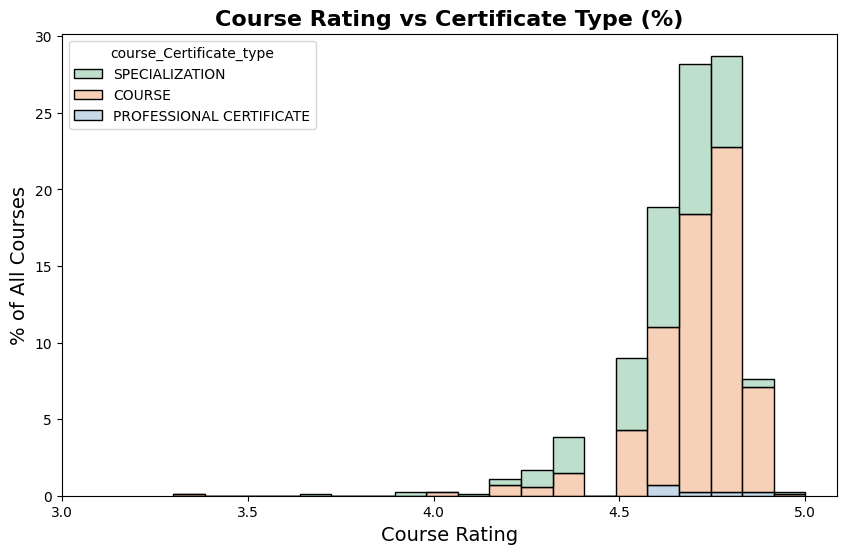

In [98]:
colors = ['#a8d5ba', '#f4c2a0', '#b3cde0', '#f2b8b5']

plt.figure(figsize=(10, 6))
sns.histplot(
    data=cd_df,
    x='course_rating',
    hue='course_difficulty',
    multiple="stack",
    bins=20,
    palette=colors,
    stat="percent"
)
plt.title('Course Rating vs Difficulty (%)', fontsize=18, fontweight="bold")
plt.xlabel('Course Rating', fontsize=14)
plt.ylabel('% of All Courses', fontsize=14)
plt.xticks(np.arange(3.0, 5.1, 0.5))
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(
    data=cd_df,
    x='course_rating',
    hue='course_Certificate_type',
    multiple="stack",
    bins=20,
    palette=colors,
    stat="percent"
)
plt.title('Course Rating vs Certificate Type (%)', fontsize=16, fontweight="bold")
plt.xlabel('Course Rating', fontsize=14)
plt.ylabel('% of All Courses', fontsize=14)
plt.xticks(np.arange(3.0, 5.1, 0.5))
plt.show()


For Beginner difficulty, there are 487 courses.
For Intermediate difficulty, there are 198 courses.
For Mixed difficulty, there are 187 courses.
For Advanced difficulty, there are 19 courses.


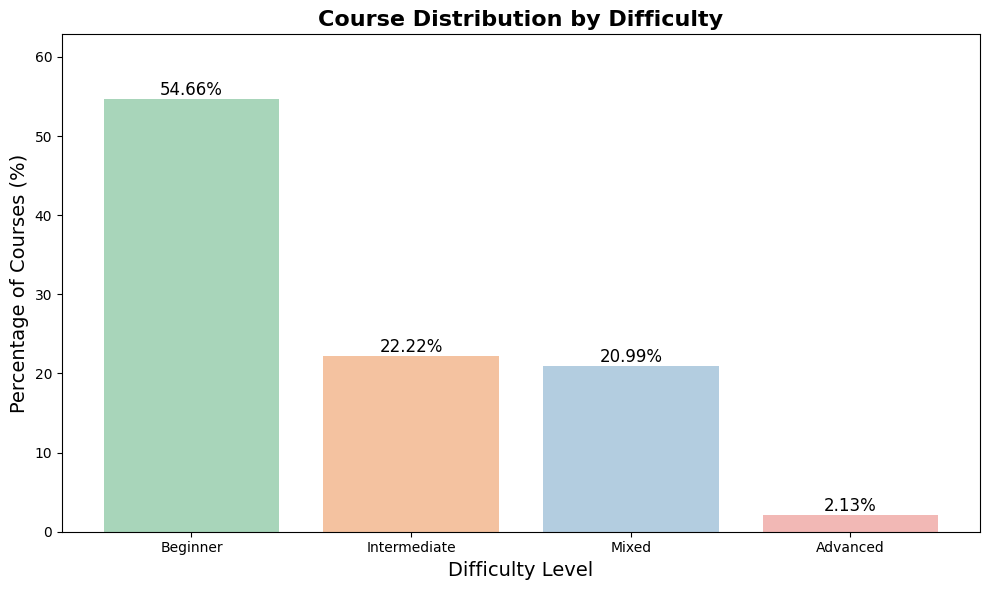

In [99]:
difficulty_course_counts = cd_df['course_difficulty'].value_counts()
difficulty_percent = (difficulty_course_counts / difficulty_course_counts.sum()) * 100
difficulty_colors = ['#a8d5ba', '#f4c2a0', '#b3cde0', '#f2b8b5']

plt.figure(figsize=(10, 6))
bars = plt.bar(difficulty_course_counts.index, difficulty_percent, color=difficulty_colors)

for bar, pct in zip(bars, difficulty_percent):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{pct:.2f}%",
        ha='center',
        va='bottom',
        fontsize=12
    )

plt.title("Course Distribution by Difficulty", fontsize=16, fontweight="bold")
plt.xlabel("Difficulty Level", fontsize=14)
plt.ylabel("Percentage of Courses (%)", fontsize=14)
plt.ylim(0, difficulty_percent.max() * 1.15)
plt.tight_layout()

for difficulty, count in difficulty_course_counts.items():
    print(f"For {difficulty} difficulty, there are {count} courses.")

plt.show()


### **Conclusion:**

More than half of the courses are at the Beginner difficulty level. Intermediate and Mixed courses follow closely, each making up more than one-fifth of all courses. Advanced courses take only 1/50 of the entire course amount.

**8. Student enrollment for each course difficulty.**

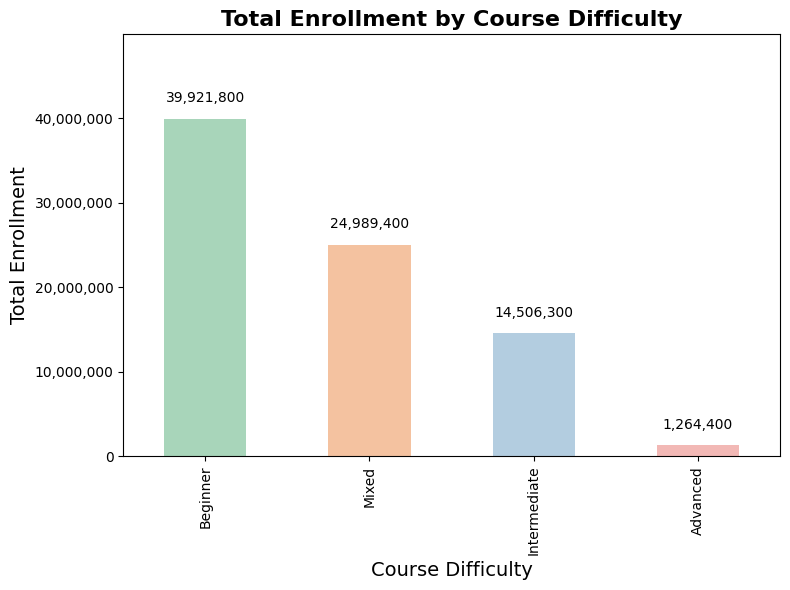

In [100]:
total_enrollment_by_difficulty = cd_df.groupby('course_difficulty', observed=False)['course_students_enrolled'].sum()

difficulty_colors = ['#a8d5ba', '#f4c2a0', '#b3cde0', '#f2b8b5']

ax = total_enrollment_by_difficulty.sort_values(ascending=False).plot(
    kind='bar',
    color=difficulty_colors,
    figsize=(8, 6)
)

ax.set_title('Total Enrollment by Course Difficulty', fontweight="bold", fontsize=16)
ax.set_xlabel('Course Difficulty', fontsize=14)
ax.set_ylabel('Total Enrollment', fontsize=14)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

ax.set_ylim(0, total_enrollment_by_difficulty.max() * 1.25)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height()):,}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        xytext=(0, 10),
        textcoords='offset points',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


### **Conclusion:**

Half of the students enrolled in beginner courses, which suggests that most people chose Coursera to explore new topics and learn new skills. Less than 2 percent enrolled in advanced courses, which could indicate that people prefer not to spend too much time on one topic or skill, instead improving their abilities elsewhere or developing knowledge through work later on.

**9. Percentage of course types for each difficulty.**

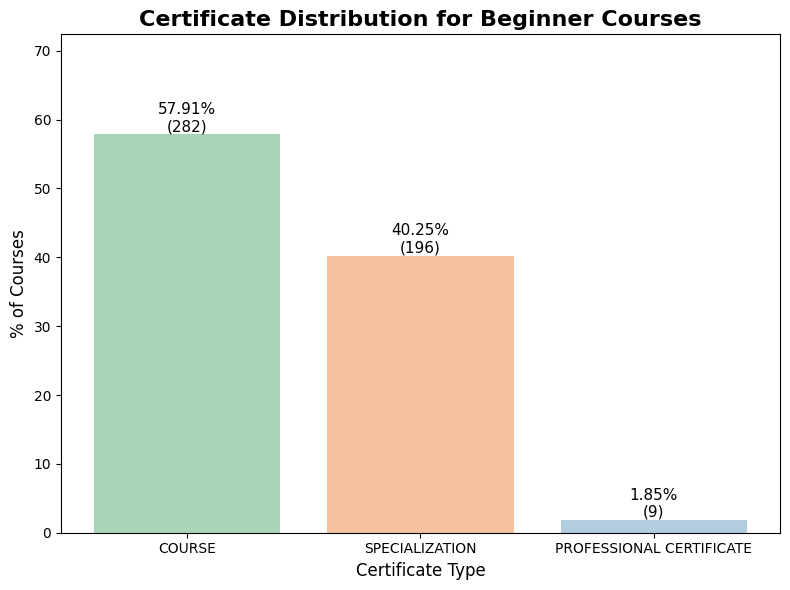

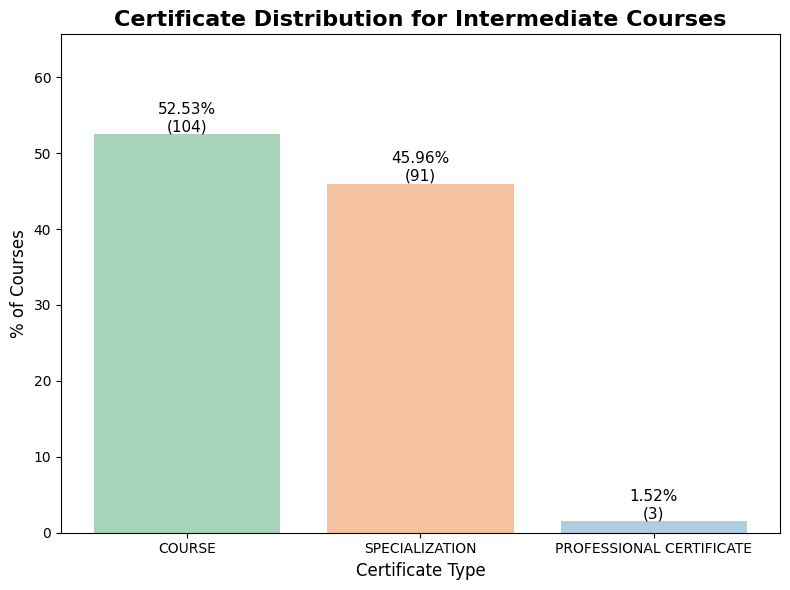

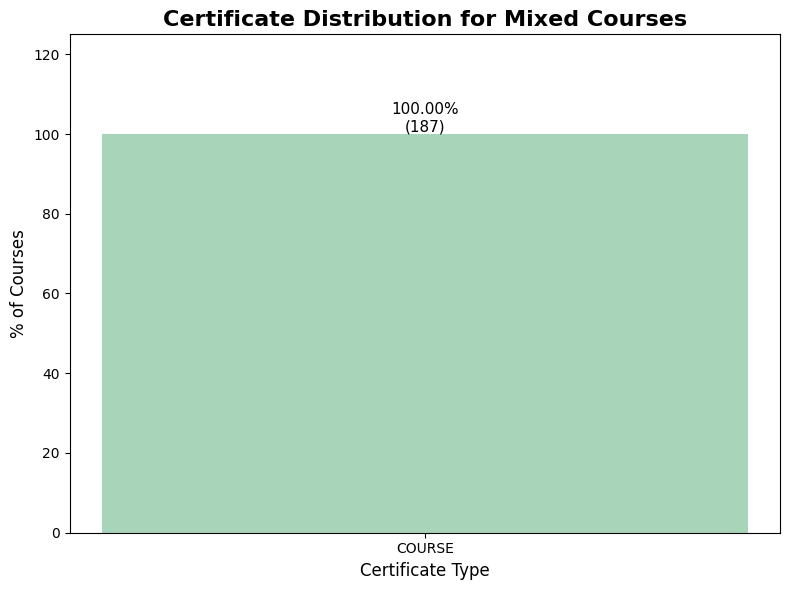

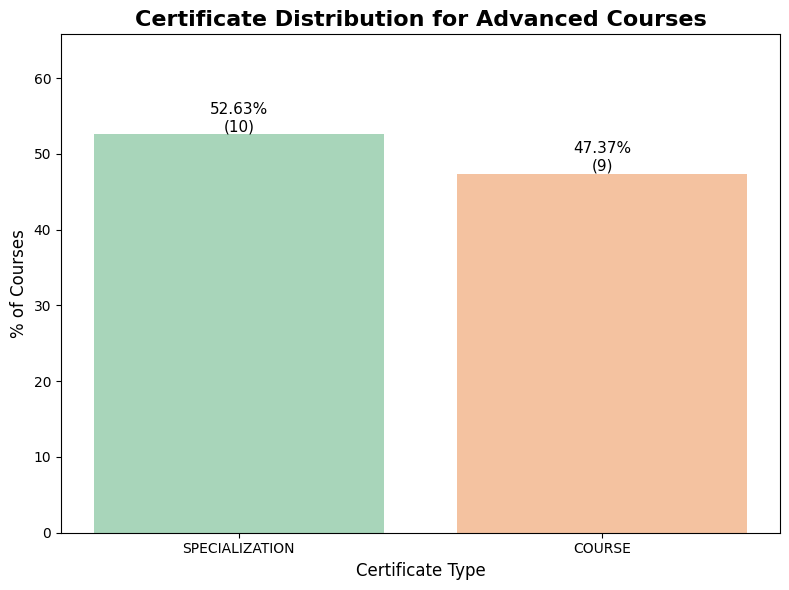

In [101]:
colors = ['#a8d5ba', '#f4c2a0', '#b3cde0', '#f2b8b5']

difficulties = cd_df['course_difficulty'].unique()

for difficulty in difficulties:
    filtered = cd_df[cd_df['course_difficulty'] == difficulty]
    certificate_counts = filtered['course_Certificate_type'].value_counts()
    certificate_pct = certificate_counts / certificate_counts.sum() * 100

    plt.figure(figsize=(8, 6))
    color_list = colors[:len(certificate_counts)]
    bars = plt.bar(certificate_counts.index, certificate_pct.values, color=color_list)

    for bar, pct, count in zip(bars, certificate_pct.values, certificate_counts.values):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{pct:.2f}%\n({count})",
            ha='center',
            va='bottom',
            fontsize=11
        )

    plt.title(f"Certificate Distribution for {difficulty} Courses", fontsize=16, fontweight="bold")
    plt.xlabel("Certificate Type", fontsize=12)
    plt.ylabel("% of Courses", fontsize=12)
    plt.ylim(0, certificate_pct.max() * 1.25)
    plt.tight_layout()
    plt.show()


### **Conclusion:**

For beginner and intermediate difficulty courses, most are course-type courses, closely followed by specializations, with only a few offering professional certificates. This suggests that professional certificates are either not in high demand by learners or organizations cannot offer them through this platform. From the available data, it's hard to pinpoint the exact reason— it could be related to time, price, difficulty, requirements, or other factors.

Mixed difficulty courses are 100% course-type, which may indicate that this is what learners are looking for and what organizations are able to provide.

Advanced courses, totaling only 19, are almost evenly split between specializations and course types, showing a balance between the two.

It’s interesting that advanced and mixed courses don't offer professional certificates, which could suggest that providing this type of learning through the Coursera platform is challenging.

A more in-depth look at the organizations offering each certificate type is needed.

**10. Enrollment by certificate type**

/var/folders/8t/6w6q98yx07q6d71t4r6d73hh0000gn/T/ipykernel_17988/1307629194.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(certificate_enrollments.index, rotation=360, ha='right')
/var/folders/8t/6w6q98yx07q6d71t4r6d73hh0000gn/T/ipykernel_17988/1307629194.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(certificate_enrollments.index, rotation=360, ha='right')
/var/folders/8t/6w6q98yx07q6d71t4r6d73hh0000gn/T/ipykernel_17988/1307629194.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(certificate_enrollments.index, rotation=360, ha='right')
/var/folders/8t/6w6q98yx07q6d71t4r6d73hh0000gn/T/ipykernel_17988/1307629194.py:26: UserWarning: set_ticklabels() should only be used 

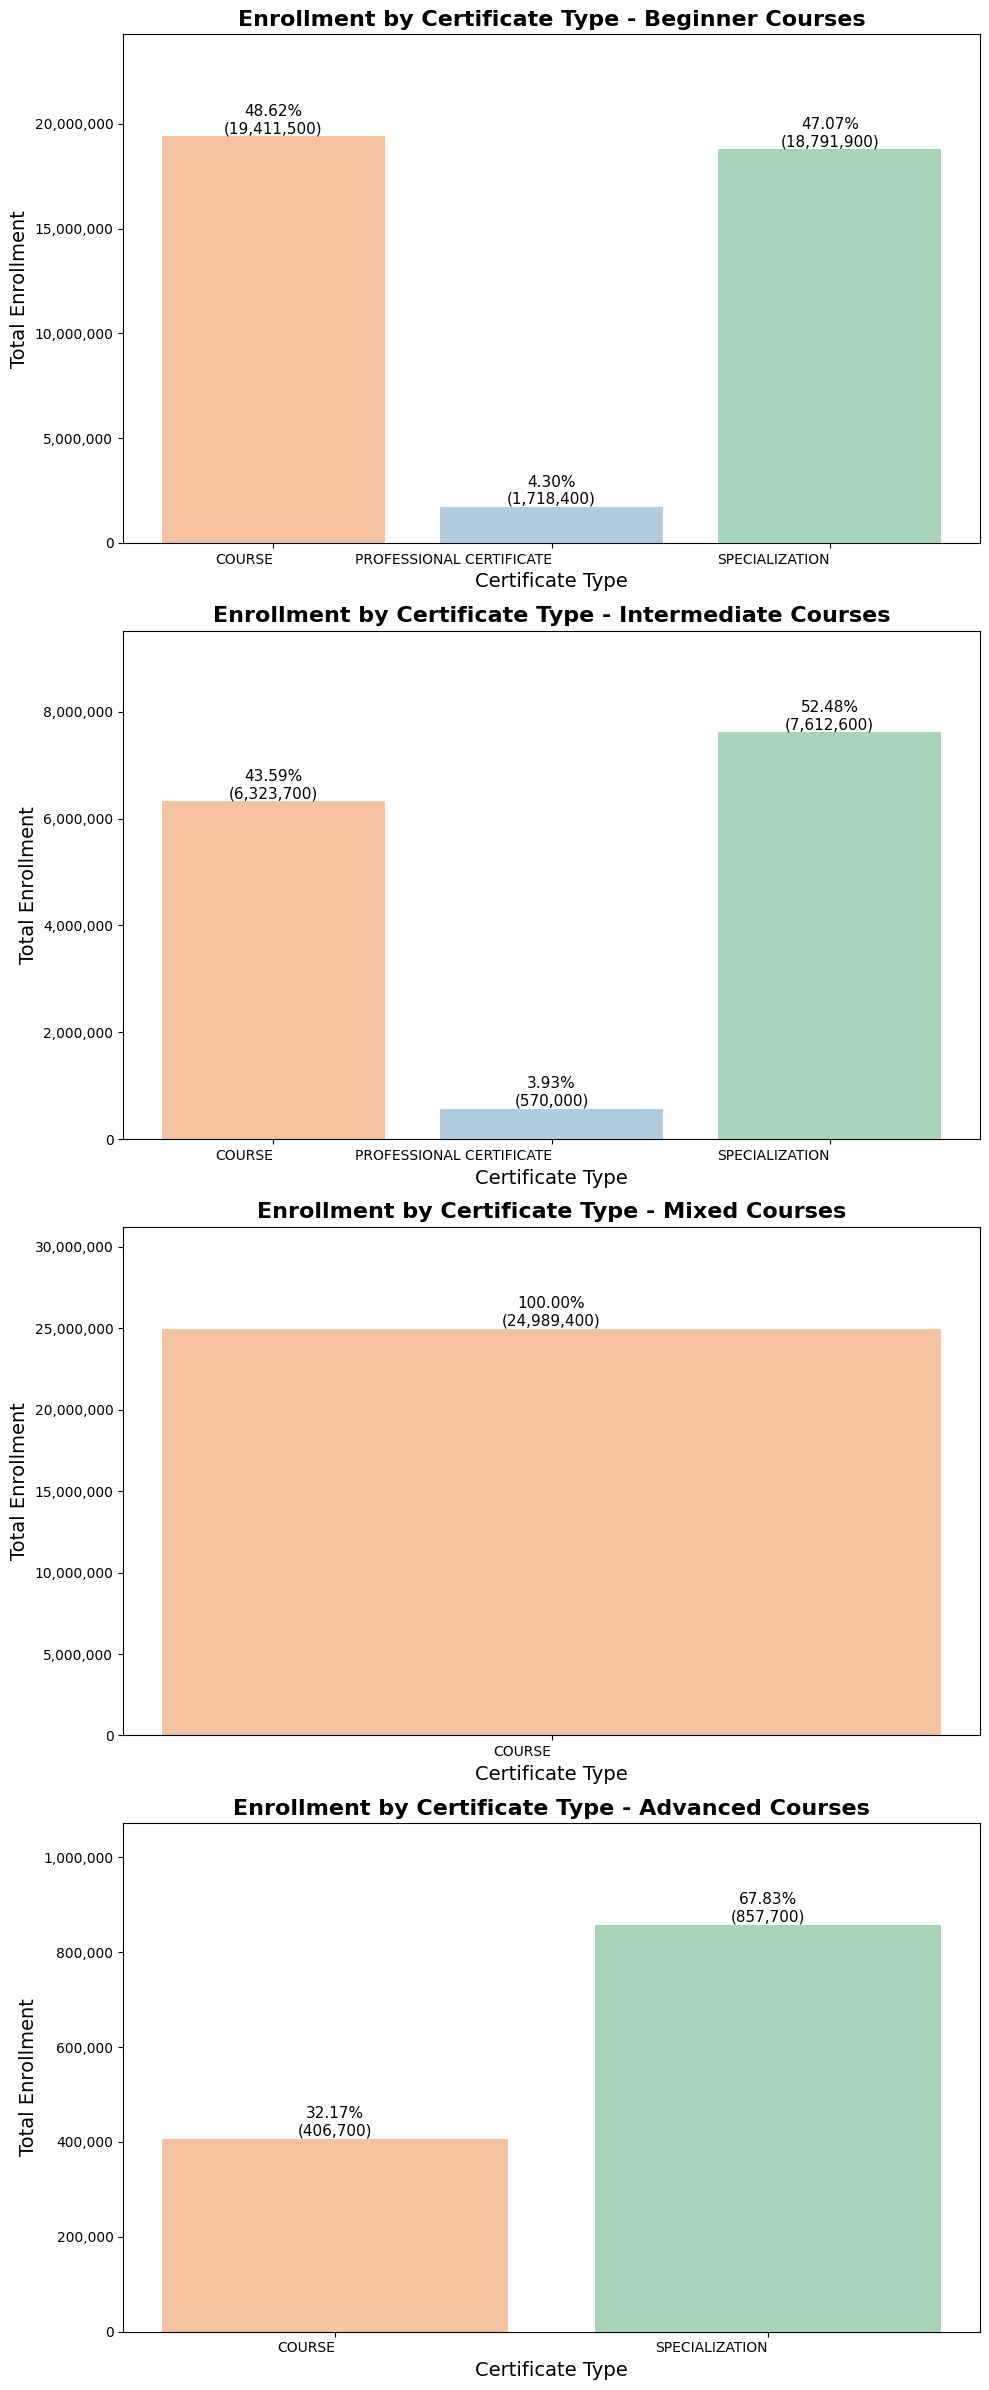

In [102]:
colors = ['#a8d5ba', '#f4c2a0', '#b3cde0']
certificate_types = cd_df['course_Certificate_type'].unique()

color_map = {cert: colors[i % len(colors)] for i, cert in enumerate(certificate_types)}

difficulties = cd_df['course_difficulty'].unique()

fig, axes = plt.subplots(len(difficulties), 1, figsize=(10, 6 * len(difficulties)))

for i, difficulty in enumerate(difficulties):
    filtered_data = cd_df[cd_df['course_difficulty'] == difficulty]

    certificate_enrollments = filtered_data.groupby('course_Certificate_type')['course_students_enrolled'].sum()

    total_enrollment = certificate_enrollments.sum()
    pct_enrollment = (certificate_enrollments / total_enrollment) * 100

    ax = axes[i] if len(difficulties) > 1 else axes
    bar_colors = [color_map[c] for c in certificate_enrollments.index]

    bars = ax.bar(certificate_enrollments.index, certificate_enrollments.values, color=bar_colors)

    ax.set_title(f"Enrollment by Certificate Type - {difficulty} Courses", fontsize=16, fontweight="bold")
    ax.set_xlabel("Certificate Type", fontsize=14)
    ax.set_ylabel("Total Enrollment", fontsize=14)
    ax.set_xticklabels(certificate_enrollments.index, rotation=360, ha='right')
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

    ax.set_ylim(0, certificate_enrollments.max() * 1.25)

    for bar, pct, count in zip(bars, pct_enrollment.values, certificate_enrollments.values):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{pct:.2f}%\n({count:,.0f})",
            ha='center',
            va='bottom',
            fontsize=11
        )

plt.tight_layout()
plt.show()


### **Conclusion:**

Enrollment in beginner and intermediate courses is almost equally represented by course and specialization certificate types, indicating that most students found either option suitable for their needs. Enrollment for professional certificates, however, is more than 10 times lower, suggesting it is not a very popular choice among students. More data is needed to determine the precise reasons for this trend.

Since mixed courses only offer the course certificate type, it is clear that all enrolled students in this difficulty level chose courses.

A shift in enrollment occurs in advanced courses, where students tend to enroll more in specializations. This could indicate that these students have specific needs or are aiming to advance in their careers. However, as noted earlier, more data is required to make this conclusion more precise.


**11. Top 15 Organizations in Coursera by enrollment**


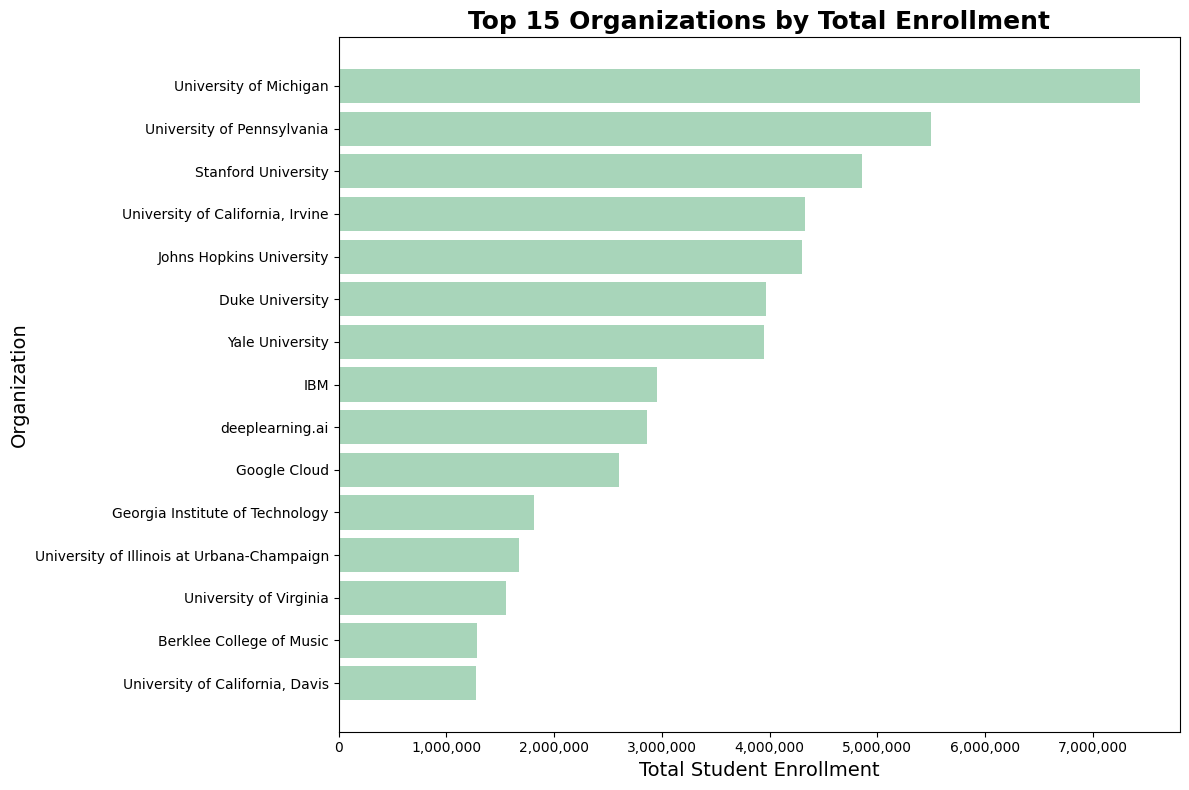

In [103]:
org_enrollment = (
    cd_df.groupby('course_organization')['course_students_enrolled']
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(12, 8))

plt.barh(
    org_enrollment.index,
    org_enrollment.values,
    color=['#a8d5ba'] * len(org_enrollment)
)

plt.title("Top 15 Organizations by Total Enrollment", fontsize=18, fontweight="bold")
plt.xlabel("Total Student Enrollment", fontsize=14)
plt.ylabel("Organization", fontsize=14)

plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.tight_layout()
plt.show()



### **Conclusion:**

Among the top-enrolled organizations, most are universities, many of which are well-known. This indicates that people tend to trust and perceive greater value in certificates from courses offered by these institutions.

**12. Top 15 courses in coursera by enrollment**

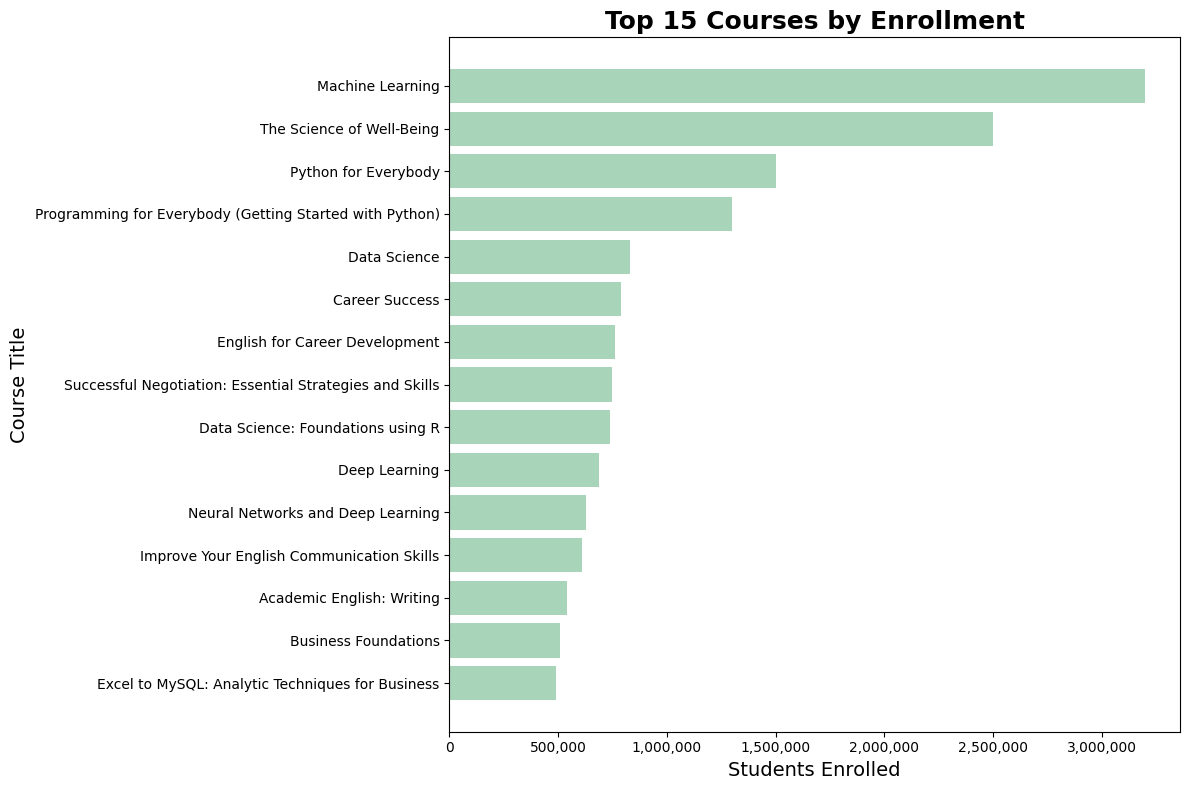

In [104]:
top_15_courses = cd_df.sort_values(by='course_students_enrolled', ascending=False).head(15)

plt.figure(figsize=(12, 8))

plt.barh(
    top_15_courses['course_title'],
    top_15_courses['course_students_enrolled'],
    color='#a8d5ba'
)

plt.title("Top 15 Courses by Enrollment", fontsize=18, fontweight="bold")
plt.xlabel("Students Enrolled", fontsize=14)
plt.ylabel("Course Title", fontsize=14)

plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

plt.tight_layout()
plt.show()


### **Conclusion:**

Among the top-enrolled courses, several topics stand out as being particularly popular: AI (machine learning and deep learning), data and analytics, programming, business, and well-being geared toward self-development and improvement, such as career advancement or language proficiency.

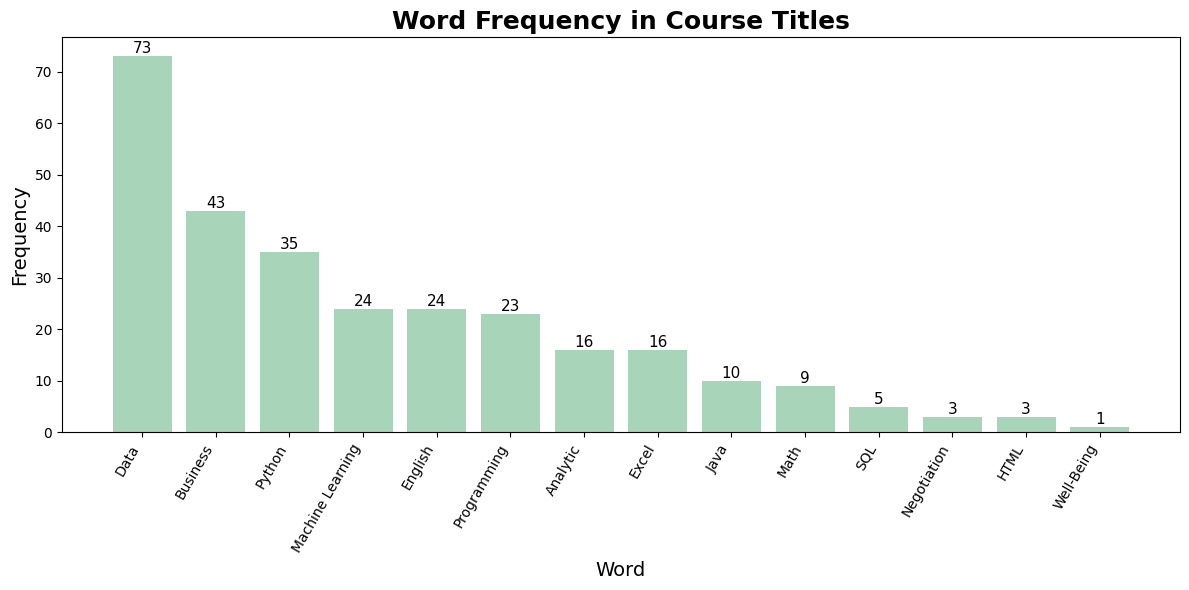

In [105]:
words_to_track = ['Programming', 'Python', 'Analytic', 'Java', 'Data', 'Machine Learning',
                  'English', 'Business', 'Well-Being', 'Excel', 'Negotiation', 'SQL', 'Math', 'HTML']

word_counts = {word: 0 for word in words_to_track}

for title in cd_df['course_title']:
    for word in words_to_track:
        word_counts[word] += title.lower().count(word.lower())

word_counts_df = (
    pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
    .sort_values(by='Count', ascending=False)
)

colors = ['#a8d5ba'] * len(word_counts_df)

plt.figure(figsize=(12, 6))
bars = plt.bar(word_counts_df['Word'], word_counts_df['Count'], color=colors)

plt.title("Word Frequency in Course Titles", fontsize=18, fontweight="bold")
plt.xlabel("Word", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=60, ha='right')
plt.tight_layout()

for i, count in enumerate(word_counts_df['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=11)

plt.show()


### **Conclusion:**

By analyzing how often the main topics from the top-enrolled courses appear across all 891 courses, it is evident that data-related subjects dominate over other topics. By add some extra topics that would be relevant, I see that following data, business, Python, machine learning, English, programming in general, Excel and analytics also emerge as strong and relevant topics for a course topic. 


**13. Organization analysis and their correlation with other data.**

In [106]:
cd_df.head(10)

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.70,Beginner,5300
1,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.70,Intermediate,17000
2,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.50,Mixed,130000
3,A Law Student's Toolkit,Yale University,COURSE,4.70,Mixed,91000
4,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.80,Mixed,320000
5,ADHD: Everyday Strategies for Elementary Students,University at Buffalo,COURSE,4.70,Beginner,39000
6,AI For Everyone,deeplearning.ai,COURSE,4.80,Beginner,350000
7,AI For Medical Treatment,deeplearning.ai,COURSE,4.80,Intermediate,2400
8,AI Foundations for Everyone,IBM,SPECIALIZATION,4.70,Beginner,61000
9,AI for Medical Diagnosis,deeplearning.ai,COURSE,4.70,Intermediate,12000


In [107]:
unique_org = cd_df["course_organization"].nunique()
print(f'There are {unique_org} organizations providing online courses in Coursera')

There are 154 organizations providing online courses in Coursera


Correlation between Enrollments and Ratings: 0.2024
Correlation between Enrollments and Number of Courses: 0.4100
Correlation between Ratings and Number of Courses: -0.0044


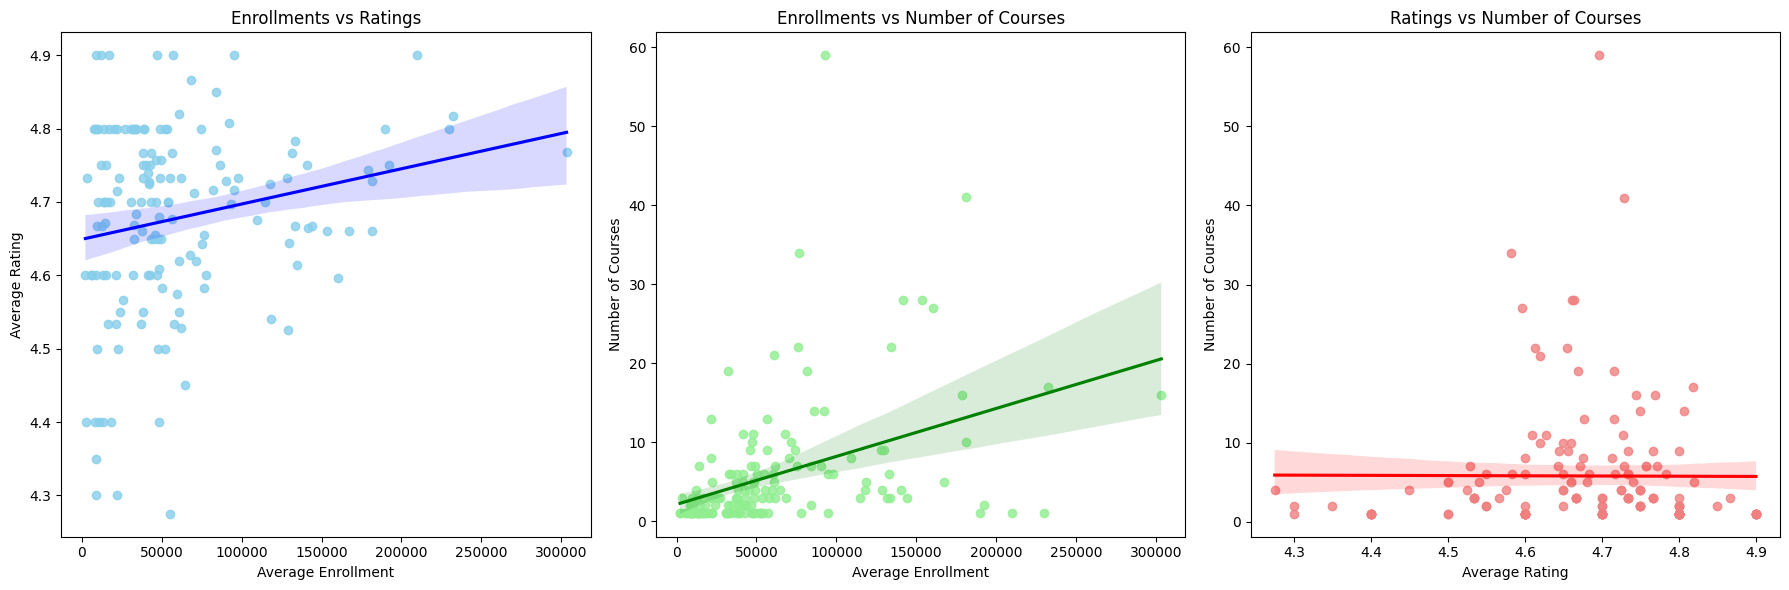

In [108]:
correlation_data = cd_df.groupby('course_organization').agg(
    average_enrollment=('course_students_enrolled', 'mean'),
    average_rating=('course_rating', 'mean'),
    course_count=('course_organization', 'size')
)

correlation_enrollment_rating = correlation_data['average_enrollment'].corr(correlation_data['average_rating'])
correlation_enrollment_courses = correlation_data['average_enrollment'].corr(correlation_data['course_count'])
correlation_rating_courses = correlation_data['average_rating'].corr(correlation_data['course_count'])

print(f"Correlation between Enrollments and Ratings: {correlation_enrollment_rating:.4f}")
print(f"Correlation between Enrollments and Number of Courses: {correlation_enrollment_courses:.4f}")
print(f"Correlation between Ratings and Number of Courses: {correlation_rating_courses:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.regplot(data=correlation_data, x='average_enrollment', y='average_rating', ax=axes[0], scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'})
axes[0].set_title('Enrollments vs Ratings')
axes[0].set_xlabel('Average Enrollment')
axes[0].set_ylabel('Average Rating')

sns.regplot(data=correlation_data, x='average_enrollment', y='course_count', ax=axes[1], scatter_kws={'color': 'lightgreen'}, line_kws={'color': 'green'})
axes[1].set_title('Enrollments vs Number of Courses')
axes[1].set_xlabel('Average Enrollment')
axes[1].set_ylabel('Number of Courses')

sns.regplot(data=correlation_data, x='average_rating', y='course_count', ax=axes[2], scatter_kws={'color': 'lightcoral'}, line_kws={'color': 'red'})
axes[2].set_title('Ratings vs Number of Courses')
axes[2].set_xlabel('Average Rating')
axes[2].set_ylabel('Number of Courses')

plt.tight_layout()
plt.show()

### **Conclusion:**

There are 154 unique organizations providing courses on Coursera, ranging from well-known universities to newer startups and other entities.

For this analysis, I examined three correlations:

Enrollment and Rating for Organizations:
This shows a weak correlation, indicating that higher enrollment might be influenced by course ratings. However, more data is needed to make this conclusion more precise, as the numbers could be affected by organizations offering courses with low enrollment.

Enrollment and Number of Courses per Organization:
A positive correlation exists, showing that students tend to enroll more with organizations that offer a higher number of courses. This suggests that providing more opportunities (i.e., more courses) attracts more students.

Rating and Number of Courses per Organization:
There is no significant correlation between course ratings and the number of courses offered by an organization. However, there are some outliers in the data.

Based on these findings, I will further analyze organizations offering more than 15 courses and those offering fewer than 15 courses to gain deeper insights.


**13.1 Organization analysis and their correlation with other data for organizations that have more than 15 courses**

In [109]:
university_course_counts = cd_df["course_organization"].value_counts()
universities_with_more_than_15_courses = university_course_counts[university_course_counts > 15]
count_of_universities = len(universities_with_more_than_15_courses)
print(f"There are {count_of_universities} organizations with more than 15 courses.")


There are 14 organizations with more than 15 courses.


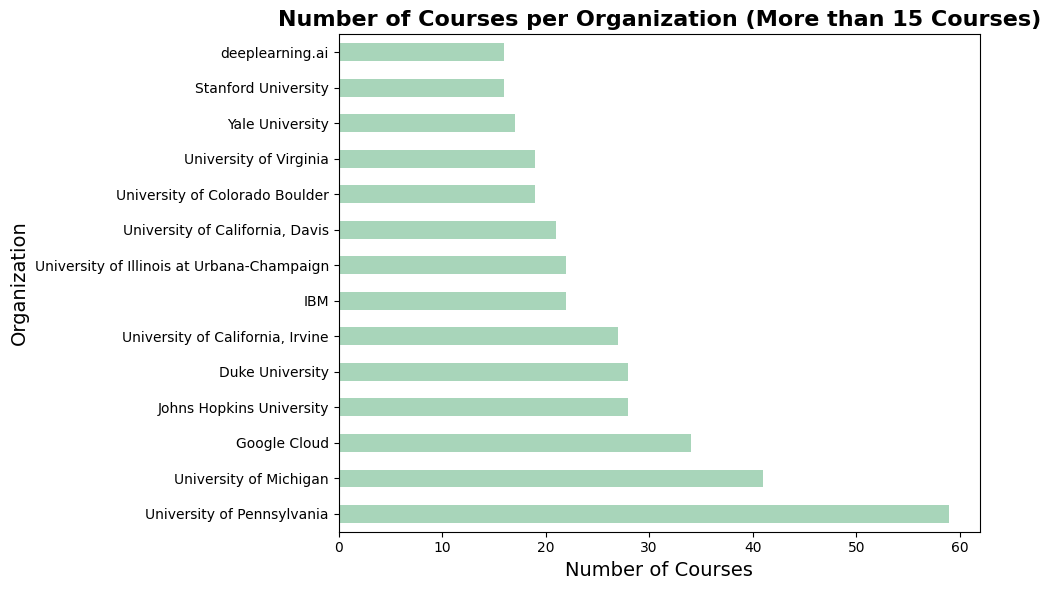

In [110]:
plt.figure(figsize=(10, 6))

universities_with_more_than_15_courses.plot(
    kind='barh',
    color='#a8d5ba'
)

plt.title('Number of Courses per Organization (More than 15 Courses)', fontsize=16, fontweight="bold")
plt.xlabel('Number of Courses', fontsize=14)
plt.ylabel('Organization', fontsize=14)

plt.tight_layout()
plt.show()


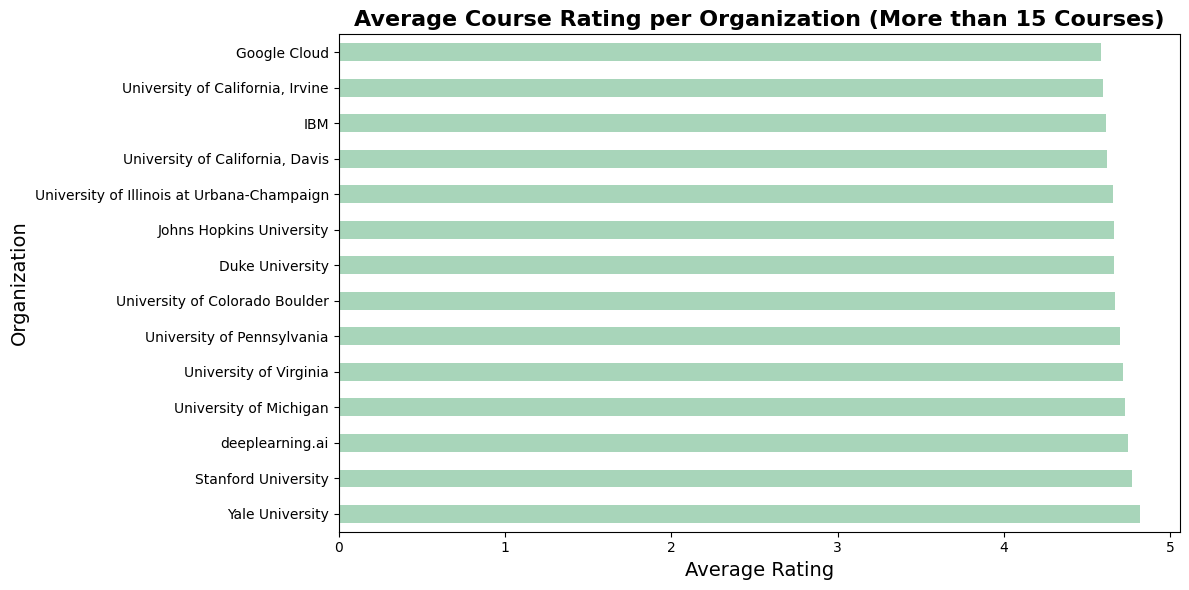

In [111]:
average_course_ratings = cd_df[
    cd_df['course_organization'].isin(universities_with_more_than_15_courses.index)
].groupby('course_organization')['course_rating'].mean()

average_course_ratings_sorted = average_course_ratings.loc[
    universities_with_more_than_15_courses.index
].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
average_course_ratings_sorted.plot(kind='barh', color='#a8d5ba')

plt.title('Average Course Rating per Organization (More than 15 Courses)', fontsize=16, fontweight="bold")
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Organization', fontsize=14)

plt.tight_layout()
plt.show()


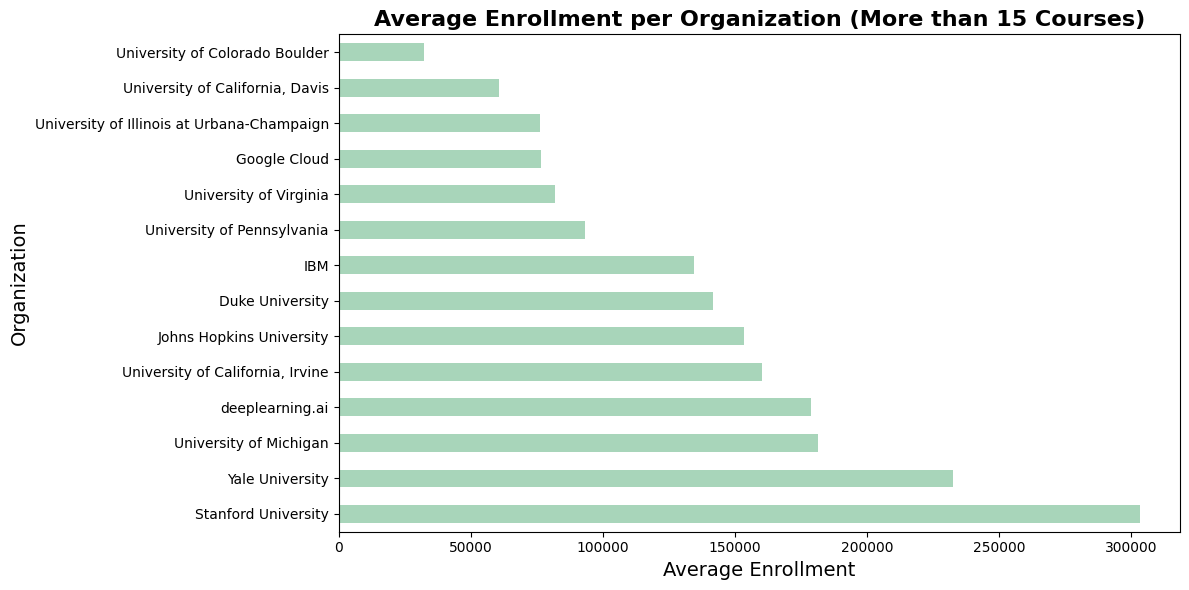

In [112]:
average_enrollment = cd_df[
    cd_df['course_organization'].isin(universities_with_more_than_15_courses.index)
].groupby('course_organization')["course_students_enrolled"].mean()

average_enrollment_sorted = average_enrollment.loc[
    universities_with_more_than_15_courses.index
].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
average_enrollment_sorted.plot(kind='barh', color='#a8d5ba')

plt.title('Average Enrollment per Organization (More than 15 Courses)', fontsize=16, fontweight="bold")
plt.xlabel('Average Enrollment', fontsize=14)
plt.ylabel('Organization', fontsize=14)

plt.tight_layout()
plt.show()


### **Conclusion:**

Most courses are provided by the University of Pennsylvania, followed by the University of Michigan and Google Cloud. The majority of courses are offered by well-known universities.

The average rating for these organizations is fairly consistent. However, the top three universities are not the ones offering the highest number of courses.

Most enrollment for top organizations is associated with those having a higher average rating, which could indicate a stronger correlation between rating and enrollment.

What's interesting is that some organizations, like Yale and Stanford, have fewer than 20 courses, but organizations like Google and the University of Pennsylvania offer more courses yet have lower enrollment and ratings.

Correlation between Enrollments and Ratings: 0.6293
Correlation between Enrollments and Number of Courses: -0.2104
Correlation between Ratings and Number of Courses: -0.1816


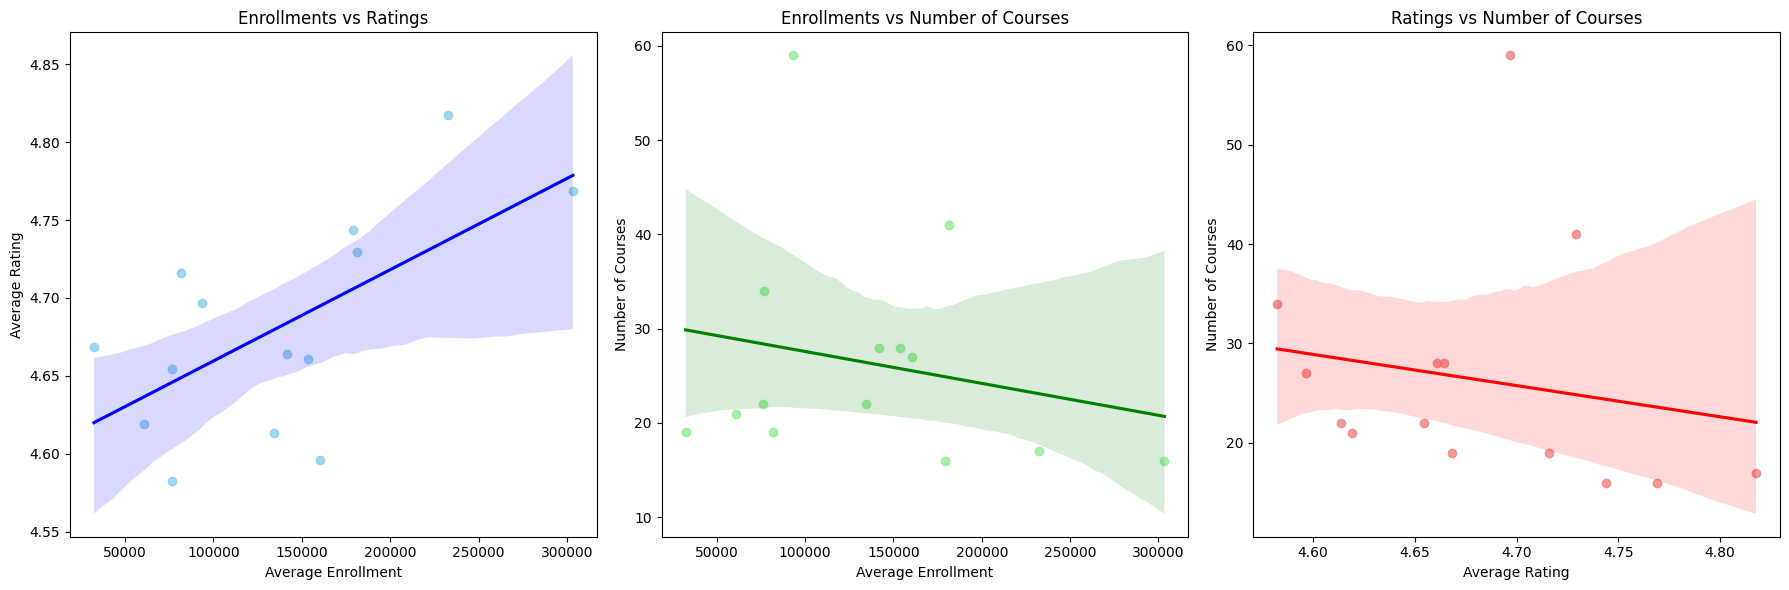

In [113]:
correlation_data = cd_df[cd_df['course_organization'].isin(universities_with_more_than_15_courses.index)]
correlation_data = correlation_data.groupby('course_organization').agg(
    average_enrollment=('course_students_enrolled', 'mean'),
    average_rating=('course_rating', 'mean'),
    course_count=('course_organization', 'size')
)

correlation_enrollment_rating = correlation_data['average_enrollment'].corr(correlation_data['average_rating'])
correlation_enrollment_courses = correlation_data['average_enrollment'].corr(correlation_data['course_count'])
correlation_rating_courses = correlation_data['average_rating'].corr(correlation_data['course_count'])

print(f"Correlation between Enrollments and Ratings: {correlation_enrollment_rating:.4f}")
print(f"Correlation between Enrollments and Number of Courses: {correlation_enrollment_courses:.4f}")
print(f"Correlation between Ratings and Number of Courses: {correlation_rating_courses:.4f}")

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.regplot(data=correlation_data, x='average_enrollment', y='average_rating', ax=axes[0], scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'})
axes[0].set_title('Enrollments vs Ratings')
axes[0].set_xlabel('Average Enrollment')
axes[0].set_ylabel('Average Rating')

sns.regplot(data=correlation_data, x='average_enrollment', y='course_count', ax=axes[1], scatter_kws={'color': 'lightgreen'}, line_kws={'color': 'green'})
axes[1].set_title('Enrollments vs Number of Courses')
axes[1].set_xlabel('Average Enrollment')
axes[1].set_ylabel('Number of Courses')

sns.regplot(data=correlation_data, x='average_rating', y='course_count', ax=axes[2], scatter_kws={'color': 'lightcoral'}, line_kws={'color': 'red'})
axes[2].set_title('Ratings vs Number of Courses')
axes[2].set_xlabel('Average Rating')
axes[2].set_ylabel('Number of Courses')

plt.tight_layout()
plt.show()


### **Conclusion:**

As previously suggested, the chart shows a slight-to-moderate correlation between enrollment and rating. This indicates that students enrolling in courses from organizations with more than 15 courses tend to consider ratings and rate them higher, which could suggest that these universities offer higher-quality material.

The correlation between enrollment and the number of courses is weakly negative, meaning that the number of courses could negatively affect overall student enrollment. This could be because the courses are very similar, or there may be other unknown factors. A good example of this is Google Cloud courses.

The correlation between rating and the number of courses suggests that for top organizations like Google Cloud, the large number of courses might have slightly affected their rating and enrollment, as shown by the weak correlation.

Both negative correlations are not drastic, but they do warrant further investigation.


**13.2 Organization analysis and their correlation with other data for organizations that have less than 15 courses**

In [114]:
university_course_counts = cd_df["course_organization"].value_counts()
universities_with_less_courses = university_course_counts[university_course_counts < 15]
count_less = len(universities_with_less_courses)
print(f"There are {count_less} organizations with less than 15 courses.")

There are 140 organizations with less than 15 courses.


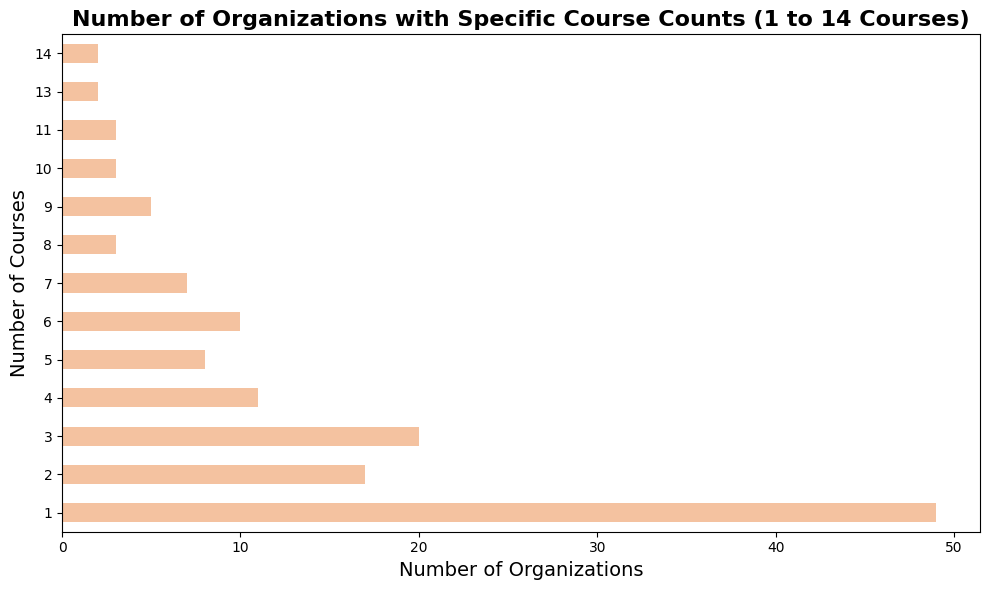

In [115]:
course_count_distribution = university_course_counts[university_course_counts < 15].value_counts().sort_index()

plt.figure(figsize=(10, 6))
course_count_distribution.plot(kind='barh', color='#f4c2a0')

plt.title('Number of Organizations with Specific Course Counts (1 to 14 Courses)', fontsize=16, fontweight="bold")
plt.xlabel('Number of Organizations', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)

plt.tight_layout()
plt.show()



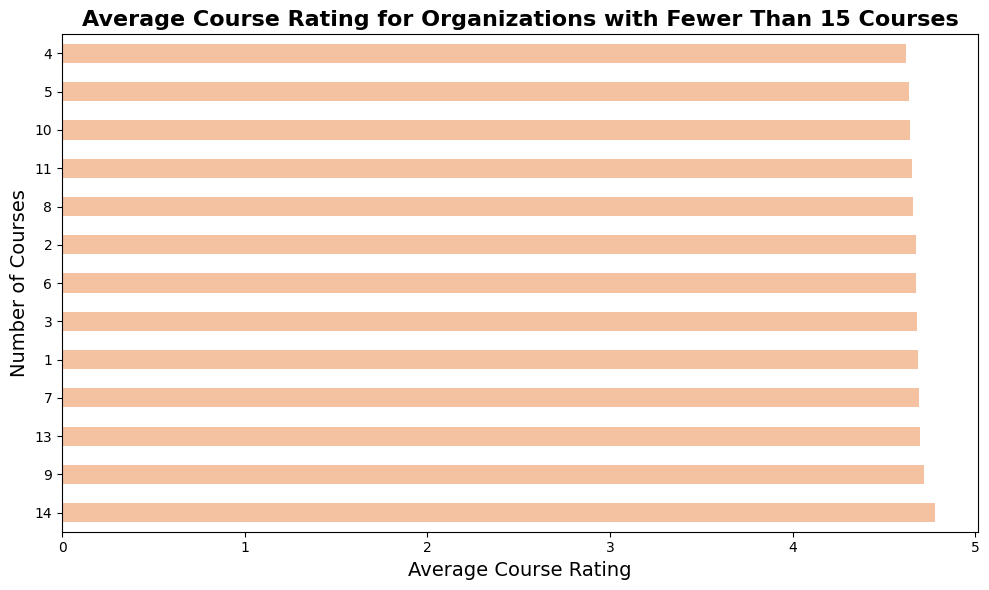

In [116]:
universities_with_less_courses = university_course_counts[university_course_counts < 15]

less_courses_df = cd_df[cd_df['course_organization'].isin(universities_with_less_courses.index)]

course_counts = less_courses_df['course_organization'].value_counts().sort_index()

avg_ratings_by_course_count = less_courses_df.groupby('course_organization').agg(
    avg_rating=('course_rating', 'mean')
)

course_counts_and_ratings = course_counts.to_frame(name='num_universities').join(avg_ratings_by_course_count)

avg_rating_per_course_count = course_counts_and_ratings.groupby('num_universities')['avg_rating'].mean()
avg_rating_per_course_count_sorted = avg_rating_per_course_count.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_rating_per_course_count_sorted.plot(kind='barh', color='#f4c2a0')

plt.title('Average Course Rating for Organizations with Fewer Than 15 Courses', fontsize=16, fontweight="bold")
plt.xlabel('Average Course Rating', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)

plt.tight_layout()
plt.show()


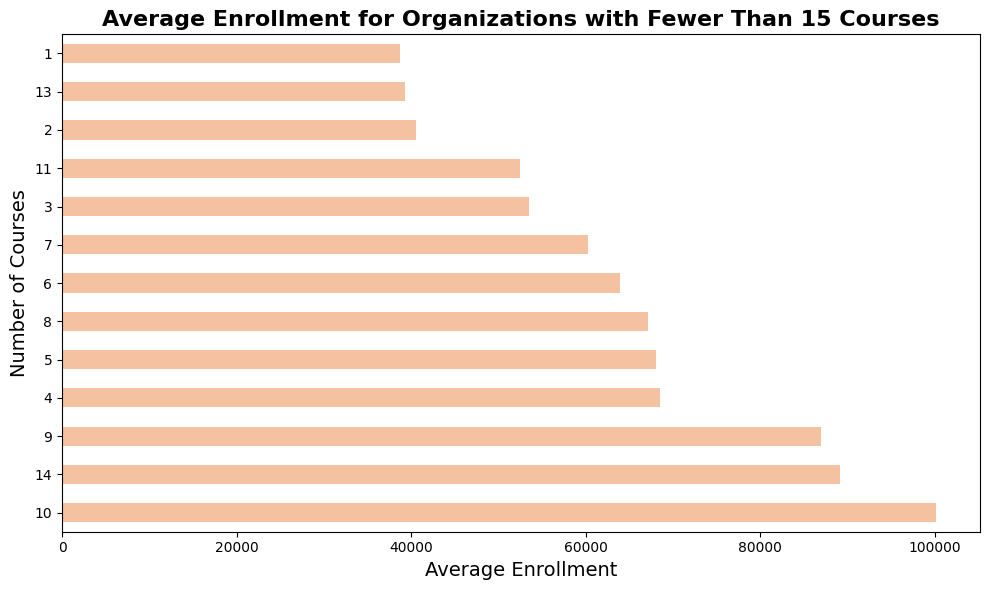

In [117]:
universities_with_less_courses = university_course_counts[university_course_counts < 15]

less_courses_df = cd_df[cd_df['course_organization'].isin(universities_with_less_courses.index)]
course_counts = less_courses_df['course_organization'].value_counts().sort_index()

avg_enrollment_by_course_count = less_courses_df.groupby('course_organization').agg(
    avg_enrollment=('course_students_enrolled', 'mean')
)

course_counts_and_enrollments = course_counts.to_frame(name='num_universities').join(avg_enrollment_by_course_count)
avg_enrollment_per_course_count = course_counts_and_enrollments.groupby('num_universities')['avg_enrollment'].mean()
avg_enrollment_per_course_count_sorted = avg_enrollment_per_course_count.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
avg_enrollment_per_course_count_sorted.plot(kind='barh', color='#f4c2a0')

plt.title('Average Enrollment for Organizations with Fewer Than 15 Courses', fontsize=16, fontweight="bold")
plt.xlabel('Average Enrollment', fontsize=14)
plt.ylabel('Number of Courses', fontsize=14)

plt.tight_layout()
plt.show()


### **Conclusion:**

There are 140 organizations that offer fewer than 15 courses. Most of them have only 1 course, and after that, most organizations offer between 2 and 7 courses.

It doesn’t appear that the number of courses in this category affects the average rating for organizations, as the ratings are very similar. Organizations with 14 courses have slightly higher ratings, which are closer to those of the first group that has more than 15 courses.

While there seems to be some potential relationship between the number of courses each organization offers and enrollment, the data is not evenly distributed, making it difficult to draw any conclusions without further correlation analysis.


Correlation between Enrollments and Ratings: 0.2027
Correlation between Enrollments and Number of Courses: 0.2642
Correlation between Ratings and Number of Courses: 0.0063


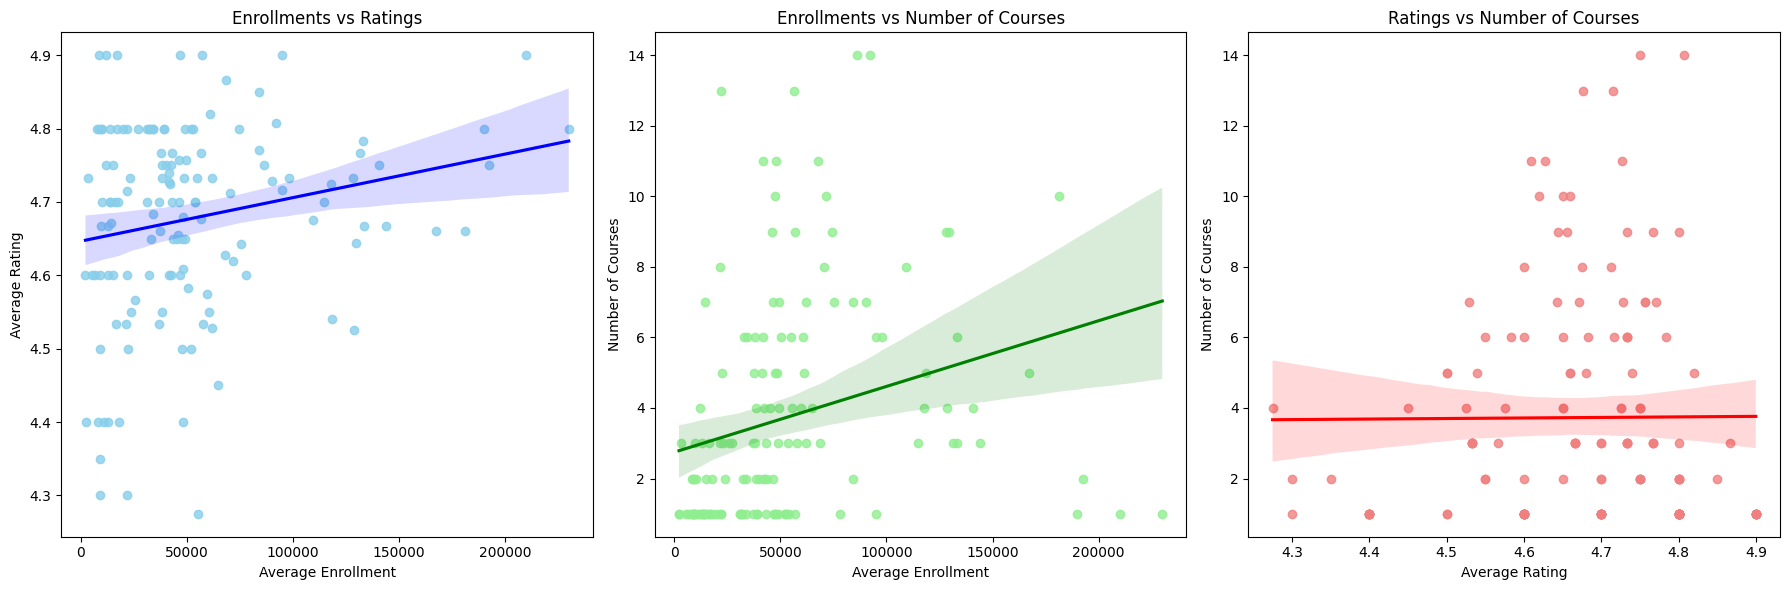

In [118]:
universities_with_less_courses = university_course_counts[university_course_counts < 15]
correlation_data = cd_df[cd_df['course_organization'].isin(universities_with_less_courses.index)]

correlation_data = correlation_data.groupby('course_organization').agg(
    average_enrollment=('course_students_enrolled', 'mean'),
    average_rating=('course_rating', 'mean'),
    course_count=('course_organization', 'size')
)


correlation_enrollment_rating = correlation_data['average_enrollment'].corr(correlation_data['average_rating'])
correlation_enrollment_courses = correlation_data['average_enrollment'].corr(correlation_data['course_count'])
correlation_rating_courses = correlation_data['average_rating'].corr(correlation_data['course_count'])

print(f"Correlation between Enrollments and Ratings: {correlation_enrollment_rating:.4f}")
print(f"Correlation between Enrollments and Number of Courses: {correlation_enrollment_courses:.4f}")
print(f"Correlation between Ratings and Number of Courses: {correlation_rating_courses:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.regplot(data=correlation_data, x='average_enrollment', y='average_rating', ax=axes[0], scatter_kws={'color': 'skyblue'}, line_kws={'color': 'blue'})
axes[0].set_title('Enrollments vs Ratings')
axes[0].set_xlabel('Average Enrollment')
axes[0].set_ylabel('Average Rating')

sns.regplot(data=correlation_data, x='average_enrollment', y='course_count', ax=axes[1], scatter_kws={'color': 'lightgreen'}, line_kws={'color': 'green'})
axes[1].set_title('Enrollments vs Number of Courses')
axes[1].set_xlabel('Average Enrollment')
axes[1].set_ylabel('Number of Courses')

sns.regplot(data=correlation_data, x='average_rating', y='course_count', ax=axes[2], scatter_kws={'color': 'lightcoral'}, line_kws={'color': 'red'})
axes[2].set_title('Ratings vs Number of Courses')
axes[2].set_xlabel('Average Rating')
axes[2].set_ylabel('Number of Courses')

plt.tight_layout()
plt.show()

### **Conclusion:**

For organizations with fewer than 15 courses, there is a weak correlation between enrollment and both rating and the number of courses. This indicates that enrollment is not significantly affected by either factor, and vice versa.

Additionally, there is no correlation between rating and the number of courses.

## **EDA Summary**

### **Main conclusion:**

To attract enrollment for new courses, I offer the following observations and recommendations to help the organization develop relevant and valuable courses that will drive high enrollment rates.

* Difficulty:
Based on this exploratory data analysis (EDA), I suggest focusing on beginner or mixed difficulty courses. Data shows that beginner courses have four times the enrollment of intermediate courses. If a beginner course is not feasible, then a mixed difficulty course would be a good alternative, with nearly twice the enrollment of intermediate courses. Advanced courses should only be developed as follow-up courses to beginner or mixed difficulty courses, as they have significantly lower enrollment rates.

* Course Type:
Based on the EDA, I recommend offering courses as either a course type or specialization type with a certificate. Course-type courses have significantly larger enrollment, and specialization-type courses follow closely behind. I advise against focusing on professional certificate courses, as they do not yield high enrollment or business value. However, they could be offered as optional follow-ups, consisting of several courses and specializations for students looking to level up from previous courses.

* Course Topic:
Based on the EDA, top-enrolled courses, and their learning topics, I suggest making data-related courses the primary focus. For secondary focus, I recommend considering topics such as business, Python, machine learning, English, and general programming. Additionally, Excel and analytics emerge as strong and relevant topics for new courses.
For the third focus, I recommend offering more specialized skills within the same fields, such as SQL, Java, business English, and others.

* Collaboration with an Organization:
Based on the EDA, it is clear that some of the most successful courses by enrollment are provided by well-known universities. I suggest exploring collaboration opportunities with these institutions to either launch courses through them or leverage their brand name. Since there is a correlation between enrollment and rating for top universities, this could help the courses not only achieve higher enrollment but also appear among the top-rated courses.

* Course Count:
The correlations do not show any strong connection between the number of courses and success. Therefore, I suggest focusing on collaborating with universities that have the highest enrollment and ratings.
I would recommend having around 9-10 courses, as it seems to be the turning point for achieving higher enrollment, around 100,000 students, which could drive business success.
If the goal shifts from high enrollment to high ratings, then there is no correlation between the number of courses and ratings. In this case, I suggest focusing on a smaller number of high-quality courses with greater accessibility.

An example course would be Data Science Beginner Course for 2025 developed in collaboration with Stanford University. 



### **Suggestions for further improvement:**

With more time and data, I could dive deeper into the data to provide even more valuable insights to help guide decisions for course development.

For example:

- Analyze courses with fewer than 15 courses:
Look further into organizations with fewer than 15 courses, breaking them down into smaller categories to understand better how their course offerings affect enrollment and ratings.

- Other topics in this data set:
Explore additional courses and other topics offered by Coursera to gain a broader understanding of the course offerings and identify any other patterns or opportunities that could impact course development and enrollment.

- Include price data:
Gather pricing information for each course to improve decision-making. The price can significantly impact enrollment trends and help identify any patterns between course cost and student enrollment.

- Incorporate course length data:
Collect data on the duration of each course to better understand how the length of a course influences enrollment decisions. Some students might prefer shorter courses, while others may be drawn to longer, more comprehensive ones.

- Gather data on course topic relevance from employers:
Request or gather feedback from hiring companies, both globally and regionally, about the relevance of specific course topics and skills. This would help ensure that course offerings align with current job market demands.

- Regional enrollment data:
Look into regional differences in course enrollment to identify specific audience segments. Understanding which regions have the highest demand for certain courses could help target marketing and course development efforts more effectively.

- Examine upcoming trends for 2025:
Research potential course trends for 2025, such as new technologies, in-demand skills, or shifts in education. This foresight would allow us to anticipate which course topics will attract students in the near future.

- Interactive visualizations:
Make visualizations more interactive. This would allow stakeholders to explore the data more dynamically and gain deeper insights. Interactive charts and graphs could be especially useful for presentations and decision-making.

- Other learning platforms:
Consider looking into data from other learning platforms and comparing it to Coursera’s data. This would offer valuable insights into the competitive landscape and help identify opportunities for improvement, emerging trends, and strategies to boost engagement and enrollment.

- Use clustering:
To observe different patterns and groups 
